In [8]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [9]:
zip_code = "../Data Set/zip_code.csv"
zip_code_df = pd.read_csv(zip_code)
zip_code_df.head()

,ZIP,Neighborhood,Borough,Cases,"Cases per 100,000","Deaths per 100,000",Percent positive<br>(of people tested)
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,420,1782.45,106.10,6.95
1,10002,Chinatown/Lower East Side,Manhattan,1237,1611.61,208.45,10.00
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,516,959.08,63.20,5.39
3,10004,Financial District,Manhattan,39,1068.32,27.39,6.04
4,10005,Financial District,Manhattan,81,964.73,23.82,5.31


In [10]:
median = "../Data Set/median_incomes.csv"
median_income_df = pd.read_csv(median, quoting=csv.QUOTE_MINIMAL, skipinitialspace=True, )
median_income_df.head()

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
0,Riverdale,All Households,2005,Dollars,"$60,686.22",208
1,Williamsbridge,All Households,2005,Dollars,"$49,881.99",212
2,Throgs Neck,All Households,2005,Dollars,"$55,211.29",210
3,Pelham Parkway,All Households,2005,Dollars,"$50,494.64",211
4,Morrisania,All Households,2005,Dollars,"$23,524.24",203


In [11]:
median_income_df.dtypes

Location          object
Household Type    object
TimeFrame          int64
DataFormat        object
Data              object
Fips               int64
dtype: object

In [12]:
household = median_income_df.loc[(median_income_df['Household Type'] == 'All Households')]

In [13]:
time = household.loc[(household["TimeFrame"] == 2018)]
time.tail()

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
3440,Brooklyn,All Households,2018,Dollars,"$61,220.00",36047
3441,Manhattan,All Households,2018,Dollars,"$85,066.00",36061
3442,Queens,All Households,2018,Dollars,"$69,320.00",36081
3443,Staten Island,All Households,2018,Dollars,"$82,166.00",36085
3444,New York City,All Households,2018,Dollars,"$63,799.00",3651000


In [14]:
boroughs = time.tail(6)
boroughs

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
3439,Bronx,All Households,2018,Dollars,"$38,467.00",36005
3440,Brooklyn,All Households,2018,Dollars,"$61,220.00",36047
3441,Manhattan,All Households,2018,Dollars,"$85,066.00",36061
3442,Queens,All Households,2018,Dollars,"$69,320.00",36081
3443,Staten Island,All Households,2018,Dollars,"$82,166.00",36085
3444,New York City,All Households,2018,Dollars,"$63,799.00",3651000


In [15]:
borough = boroughs.drop(['Household Type', 'DataFormat', 'TimeFrame', 'Fips'], axis=1)

borough.columns = ["Borough", "average_household_income"]
borough

,Borough,average_household_income
3439,Bronx,"$38,467.00"
3440,Brooklyn,"$61,220.00"
3441,Manhattan,"$85,066.00"
3442,Queens,"$69,320.00"
3443,Staten Island,"$82,166.00"
3444,New York City,"$63,799.00"


In [16]:
spec_chars = [",", "$"]


for char in spec_chars:
    borough['average_household_income'] = borough['average_household_income'].str.replace(char,'')

borough.head()

,Borough,average_household_income
3439,Bronx,38467.00
3440,Brooklyn,61220.00
3441,Manhattan,85066.00
3442,Queens,69320.00
3443,Staten Island,82166.00


In [17]:
borough['average_household_income'] = borough['average_household_income'].str.split().str.join("")

In [18]:
borough.head()

,Borough,average_household_income
3439,Bronx,38467.00
3440,Brooklyn,61220.00
3441,Manhattan,85066.00
3442,Queens,69320.00
3443,Staten Island,82166.00


In [19]:
by_boro = "../Data Set/by-boro.csv"
by_boro_df = pd.read_csv(by_boro)
by_boro_df = by_boro_df.rename(columns={"BOROUGH_GROUP":"Borough"})

In [20]:
df_merge = pd.merge(by_boro_df, borough, on='Borough')
df_merge.head()

,Borough,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,average_household_income
0,Bronx,3494.37,883.30,274.70,50044,12650,3934,38467.00
1,Brooklyn,2403.26,612.78,217.78,62072,15827,5625,61220.00
2,Manhattan,1772.15,502.24,153.99,28863,8180,2508,85066.00
3,Queens,2970.68,760.41,261.57,67699,17329,5961,69320.00
4,Staten Island,3078.04,507.37,188.16,14657,2416,896,82166.00


<IPython.core.display.Javascript object>


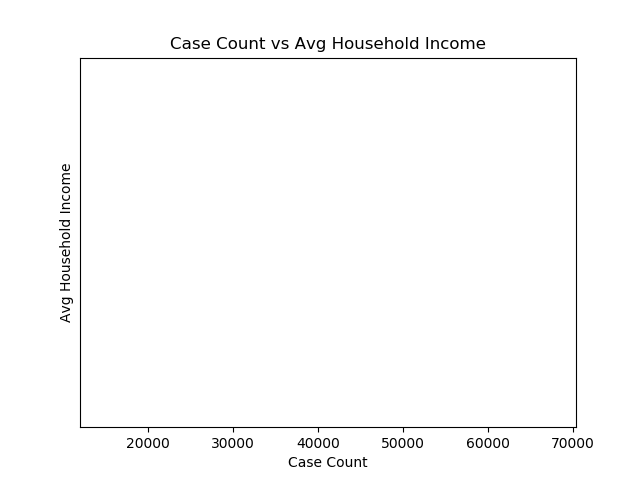

In [36]:
plt.scatter(df_merge.CASE_COUNT, df_merge.average_household_income, marker="o", facecolors="red", edgecolors="black")
plt.title("Case Count vs Avg Household Income")
plt.xlabel("Case Count")
plt.ylabel("Avg Household Income")
#plt.annotate("Bronx", (50044, 38467.00))
plt.ylim(35000,85000)
plt.show()

In [34]:
#plt.ylim(35000.00,85000.00)

(35000.0, 85000.0)

In [25]:
plt.scatter(df_merge.DEATH_COUNT, df_merge.average_household_income)
plt.title("Death Count vs Avg Household Income")
plt.xlabel("Death Count")
plt.ylabel("Avg Household Income")

Text(-1.402777777777784, 0.5, 'Avg Household Income')

In [26]:
plt.scatter(df_merge.HOSPITALIZED_COUNT, df_merge.average_household_income)